In [1]:
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_venn as vn
from scipy import stats
import seaborn as sns
from rpy2 import robjects as robj

#load r magics
%load_ext rpy2.ipython
#auto converts pulled R dataframes into pandas dataframes!
robj.pandas2ri.activate()

sns.set(font='Arial')
plt.rcParams['svg.fonttype'] = 'none'
style = sns.axes_style('white')
style.update(sns.axes_style('ticks'))
style['xtick.major.size'] = 2
style['ytick.major.size'] = 2
sns.set(font_scale=2, style=style)
pal = sns.color_palette(['#0072b2', '#d55e00', '#009e73', '#f0e442', '#cc79a7'])
sns.set_palette(pal)
sns.palplot(pal)
plt.show()

FigureCanvasNbAgg()

In [2]:
%%R
library(affy)
sessionInfo()

/home/matthew/anaconda3/envs/ml_python35/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: BiocGenerics

  warnings.warn(x, RRuntimeWarning)
/home/matthew/anaconda3/envs/ml_python35/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: parallel

  warnings.warn(x, RRuntimeWarning)
/home/matthew/anaconda3/envs/ml_python35/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching package: ‘BiocGenerics’


  warnings.warn(x, RRuntimeWarning)
/home/matthew/anaconda3/envs/ml_python35/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


  warnings.warn(x, RRuntimeWarning)
/home/matthew/anaconda3/envs/ml

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 16.04.4 LTS

Matrix products: default
BLAS: /home/matthew/anaconda3/envs/ml_python35/lib/R/lib/libRblas.so
LAPACK: /home/matthew/anaconda3/envs/ml_python35/lib/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_GB.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_GB.UTF-8        LC_COLLATE=en_GB.UTF-8    
 [5] LC_MONETARY=en_GB.UTF-8    LC_MESSAGES=en_GB.UTF-8   
 [7] LC_PAPER=en_GB.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_GB.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  tools     stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
[1] affy_1.56.0         Biobase_2.38.0      BiocGenerics_0.24.0

loaded via a namespace (and not attached):
[1] zlibbioc_1.24.0       compiler_3.4.1        BiocInstaller_1.28.0 
[4] affyio_1.48.0         preprocessCore

In [28]:
%%R -o nmm

library(oligo)
library(puma)
library(limma)

load('/home/matthew/Documents/analysis_notebooks/tair10_nmm_6h_24h/data/puma_objects.rdata')
e <- exprs(combined)
colnames(e) <- paste('exprs', colnames(e), sep='_')
s <- assayDataElement(combined, "se.exprs")
colnames(s) <- paste('err', colnames(s), sep='_')
p <- statistic(pplrs)
f <- as(getNetAffx(normalised, 'transcript'), 'data.frame')[c(9, 18)]
nmm <- merge(f, merge(merge(e, s, by=0), p, by.x='Row.names', by.y=0), by.x=0, by.y='Row.names')
nmm <- nmm[nmm['category'] == 'main',]
nmm['logFC_NMM_6h_vs_DMSO_6h'] <- nmm['exprs_NMM_6h'] - nmm['exprs_DMSO_6h']
nmm['logFC_NMM_24h_vs_DMSO_24h'] <- nmm['exprs_NMM_24h'] - nmm['exprs_DMSO_24h']
nmm['logFC_NMM_24h_vs_NMM_6h'] <- nmm['exprs_NMM_24h'] - nmm['exprs_NMM_6h']
nmm['PPLR_NMM_6h_vs_DMSO_6h'] <- nmm['2_vs_1']
nmm['PPLR_NMM_24h_vs_DMSO_24h'] <- nmm['4_vs_3']
nmm['PPLR_NMM_24h_vs_NMM_6h'] <- nmm['4_vs_2']

In [29]:
nmm.head()

,Row.names,mrnaassignment,category,exprs_DMSO_24h,exprs_DMSO_6h,exprs_NMM_24h,exprs_NMM_6h,err_DMSO_24h,err_DMSO_6h,err_NMM_24h,...,1_vs_others,2_vs_others,3_vs_others,4_vs_others,logFC_NMM_6h_vs_DMSO_6h,logFC_NMM_24h_vs_DMSO_24h,logFC_NMM_24h_vs_NMM_6h,PPLR_NMM_6h_vs_DMSO_6h,PPLR_NMM_24h_vs_DMSO_24h,PPLR_NMM_24h_vs_NMM_6h
7080,13334158,NM_099983 // RefSeq // Arabidopsis thaliana NA...,main,6.328143,6.399972,6.584596,6.424296,0.111319,0.111319,0.101930,...,0.415225,0.475207,0.253729,0.826164,0.024324,0.256453,0.160300,0.564014,0.955349,0.866938
7081,13334167,NM_099986 // RefSeq // Arabidopsis thaliana en...,main,6.732463,6.735422,6.822553,6.503099,0.079683,0.079683,0.068896,...,0.629865,0.040244,0.619821,0.866792,-0.232322,0.090091,0.319454,0.013710,0.803795,0.999479
7082,13334190,At1g01040 // The Institute for Genomic Researc...,main,4.721160,4.725343,4.723939,4.725670,0.018743,0.018743,0.018611,...,0.518715,0.523373,0.459231,0.498732,0.000328,0.002779,-0.001731,0.504947,0.541896,0.473777
7083,13334192,AT1G01073.1 // ENSEMBL // cdna:known chromosom...,main,3.939582,3.949629,3.992714,4.092797,0.077617,0.077617,0.071650,...,0.347094,0.811830,0.314601,0.496557,0.143168,0.053131,-0.100084,0.912347,0.692513,0.161645
7084,13334194,NM_001123732 // RefSeq // Arabidopsis thaliana...,main,5.484441,5.501032,5.472346,5.473653,0.035357,0.035357,0.034607,...,0.635383,0.430302,0.511956,0.420540,-0.027379,-0.012095,-0.001307,0.289995,0.403435,0.489347


In [30]:
annot = nmm.mrnaassignment.str.split('\s+///\s+', expand=True)
annot = annot.where(
    annot.apply(lambda col: col.str.contains('ENSEMBL'), axis=0))
annot['probe_cluster_id'] = nmm['Row.names']
annot = pd.melt(annot, id_vars='probe_cluster_id')
annot = (annot.drop('variable', axis=1)
              .dropna()
              .sort_values('probe_cluster_id'))
annot = annot.join(
    annot.value.str.split('\s+//\s+', expand=True)[[0, 2]]
)
annot = annot.drop('value', axis=1)
annot.columns = ['probe_cluster_id', 'transcript_id', 'desc']
annot = annot.join(
    annot['desc'].str.split('\s*[a-z]+:', expand=True)[[2, 3, 5]],
)
annot = annot.drop('desc', axis=1)
annot.columns = [
    'probe_cluster_id', 'transcript_id', 'loc', 'gene_id', 'description']
nmm_annot = annot.merge(
    nmm[['Row.names', 'exprs_DMSO_24h', 'exprs_DMSO_6h', 'exprs_NMM_24h', 'exprs_NMM_6h',
         'err_DMSO_24h', 'err_DMSO_6h', 'err_NMM_24h', 'err_NMM_6h',
         'logFC_NMM_6h_vs_DMSO_6h', 'logFC_NMM_24h_vs_DMSO_24h', 
         'logFC_NMM_24h_vs_NMM_6h', 'PPLR_NMM_6h_vs_DMSO_6h',
         'PPLR_NMM_24h_vs_DMSO_24h', 'PPLR_NMM_24h_vs_NMM_6h']],
    left_on='probe_cluster_id',
    right_on='Row.names',
    how='left'
)
nmm_annot = nmm_annot.drop(['Row.names'], axis=1)
nmm_annot.head()

,probe_cluster_id,transcript_id,loc,gene_id,description,exprs_DMSO_24h,exprs_DMSO_6h,exprs_NMM_24h,exprs_NMM_6h,err_DMSO_24h,err_DMSO_6h,err_NMM_24h,err_NMM_6h,logFC_NMM_6h_vs_DMSO_6h,logFC_NMM_24h_vs_DMSO_24h,logFC_NMM_24h_vs_NMM_6h,PPLR_NMM_6h_vs_DMSO_6h,PPLR_NMM_24h_vs_DMSO_24h,PPLR_NMM_24h_vs_NMM_6h
0,13334158,AT1G01010.1,TAIR10:1:3631:5899:1,AT1G01010,NAC domain containing protein 1,6.328143,6.399972,6.584596,6.424296,0.111319,0.111319,0.101930,0.101930,0.024324,0.256453,0.160300,0.564014,0.955349,0.866938
1,13334167,AT1G01040.2,TAIR10:1:23416:31120:1,AT1G01040,dicer-like 1,6.732463,6.735422,6.822553,6.503099,0.079683,0.079683,0.068896,0.068896,-0.232322,0.090091,0.319454,0.013710,0.803795,0.999479
2,13334167,AT1G01040.1,TAIR10:1:23146:31227:1,AT1G01040,dicer-like 1,6.732463,6.735422,6.822553,6.503099,0.079683,0.079683,0.068896,0.068896,-0.232322,0.090091,0.319454,0.013710,0.803795,0.999479
3,13334192,AT1G01073.1,TAIR10:1:44677:44787:1,AT1G01073,unknown protein\x3b FUNCTIONS IN\x3a molecular...,3.939582,3.949629,3.992714,4.092797,0.077617,0.077617,0.071650,0.071650,0.143168,0.053131,-0.100084,0.912347,0.692513,0.161645
4,13334194,AT1G01110.1,TAIR10:1:52869:54685:1,AT1G01110,IQ-domain 18,5.484441,5.501032,5.472346,5.473653,0.035357,0.035357,0.034607,0.034607,-0.027379,-0.012095,-0.001307,0.289995,0.403435,0.489347


In [201]:
dna_damage_repsonse_genes = [
    'AT1G16970', 'AT3G09660', 'At2g20950', 'AT4G38560', 'AT2G45700',
    'AT1G71310', 'AT1G66730', 'AT2G17690', 'AT3G13170', 'AT5G47870',
    'AT1G18800', 'AT2G16290', 'AT5G24280', 'AT5G40820', 'AT3G02920',
    'AT3G15150', 'AT4G31400', 'AT3G23100', 'AT3G25750', 'AT3G25100',
    'AT2G16300', 'AT1G11800', 'AT1G19025', 'AT5G01630', 'AT3G07800',
    'AT5G02820', 'AT5G56950', 'AT1G65760', 'AT3G05210', 'AT1G10520',
    'AT1G08130', 'AT2G16900', 'AT2G45280', 'AT1G07745', 'AT3G20540',
    'AT5G20850', 'AT1G52530', 'AT5G40840', 'AT1G35530', 'AT2G19490',
    'AT4G35110', 'AT5G24040', 'AT4G21070', 'AT4G35740', 'AT5G21140',
    'AT3G13782', 'AT1G80420', 'AT1G57906', 'AT5G11140', 'AT5G27680',
    'AT5G54260', 'AT1G64750', 'AT4G05360', 'AT1G61410', 'AT4G26110',
    'AT4G29170', 'AT1G04020', 'AT4G30870', 'AT5G41150', 'AT1G65470',
    'AT5G64520', 'AT1G31360', 'AT4G14970', 'AT1G79050', 'AT1G66740',
    'At4G38550', 'AT1G48050', 'AT2G19480', 'AT5G22750', 'AT1G65740',
    'AT2G20960', 'AT1G64840', 'AT5G15920', 'AT2G28560', 'AT1G74560',
    'AT4G33925', 'AT5G57160', 'AT5G67100', 'AT3G02680', 'AT3G19960',
    'AT5G15170', 'AT5G57450', 'AT3G05740', 'AT3G52115', 'AT5G38110',
    'AT3G12530', 'AT5G07660', 'AT2G31970', 'AT1G14750', 'AT3G22880',
    'AT1G27880', 'AT3G32920', 'AT2G24250', 'AT1G63990', 'AT4G16970',
    'AT5G39770', 'AT5G45010', 'AT3G10140', 'AT5G05490', 'AT1G31760',
    'AT5G15540', 'AT5G01310', 'AT1G10930', 'AT3G19210', 'AT1G60930',
    'AT4G02390', 'AT5G61460', 'AT3G59550', 'AT3G26680', 'AT5G16270',
    'AT5G63540', 'AT5G49010'
]

In [116]:
def multi_column_melt(df, id_vars, value_vars, var_name, value_names, stubs):
    melted = []
    for val_v, val_n, s in zip(value_vars, value_names, stubs):
        m = pd.melt(df, id_vars, val_v, var_name, val_n)
        m[var_name] = m[var_name].str.replace(s, '')
        melted.append(m)
    melted = reduce(lambda x, y: x.merge(y, on=[*id_vars, var_name]), melted)
    return melted

In [236]:
pd.Series(list(dna_damage_responsive.keys()),
          index=dna_damage_responsive.values())

AT1G31280     AGO2
AT5G66130    RAD17
AT4G21070    BRCA1
AT5G20850    RAD51
AT2G31320    PARP1
AT4G19130    RPA1E
AT4G22960      GRG
dtype: object

In [265]:
def barplot_gene_set(geneset):
    geneset_nmm = nmm_annot[nmm_annot.gene_id.isin(geneset)]
    geneset_nmm = multi_column_melt(
        geneset_nmm,
        ['gene_id', 'description', 'PPLR_NMM_6h_vs_DMSO_6h'],
        [['exprs_DMSO_6h', 'exprs_NMM_6h', 'exprs_DMSO_24h', 'exprs_NMM_24h'],
         ['err_DMSO_6h', 'err_NMM_6h', 'err_DMSO_24h', 'err_NMM_24h']],
        var_name='condition',
        value_names=['expression', 'error'],
        stubs=['exprs_', 'err_']
    ).drop_duplicates()
    geneset_nmm = geneset_nmm.sort_values(by='gene_id')
    geneset_nmm['gene_name'] = geneset_nmm.gene_id.map(geneset)
    x = np.arange(len(geneset))
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.bar(x=x - 0.2,
           height=geneset_nmm[geneset_nmm.condition == 'DMSO_6h'].expression.values,
           yerr=geneset_nmm[geneset_nmm.condition == 'DMSO_6h'].error.values,
           label='DMSO',
           width=0.4)
    ax.bar(x=x + 0.2,
           height=geneset_nmm[geneset_nmm.condition == 'NMM_6h'].expression.values,
           yerr=geneset_nmm[geneset_nmm.condition == 'NMM_6h'].error.values,
           label='NMM',
           width=0.4)
    y = geneset_nmm[geneset_nmm.condition == 'NMM_6h'].expression.values.max() + 0.5
    for i, pplr in enumerate(geneset_nmm[geneset_nmm.condition == 'NMM_6h'].PPLR_NMM_6h_vs_DMSO_6h.values):
        if pplr < 0.05 or pplr > 0.95:
            ax.annotate(xy=(i-0.1, y), s='*')
    ax.set_xticks(x)
    ax.set_xticklabels(geneset_nmm[geneset_nmm.condition == 'NMM_6h'].gene_name, rotation=30, ha='right')
    ax.set_ylim(0, y + 1)
    plt.legend(loc=0)
    return ax

In [280]:
nmm_annot[nmm_annot.gene_id == 'AT1G31280']

,probe_cluster_id,transcript_id,loc,gene_id,description,exprs_DMSO_24h,exprs_DMSO_6h,exprs_NMM_24h,exprs_NMM_6h,err_DMSO_24h,err_DMSO_6h,err_NMM_24h,err_NMM_6h,logFC_NMM_6h_vs_DMSO_6h,logFC_NMM_24h_vs_DMSO_24h,logFC_NMM_24h_vs_NMM_6h,PPLR_NMM_6h_vs_DMSO_6h,PPLR_NMM_24h_vs_DMSO_24h,PPLR_NMM_24h_vs_NMM_6h
2394,13346655,AT1G31280.1,TAIR10:1:11181711:11185344:1,AT1G31280,Argonaute family protein,6.0937,6.018782,6.697507,7.254261,0.122037,0.122037,0.100595,0.100595,1.235479,0.603808,-0.556754,1.0,0.999933,0.000045


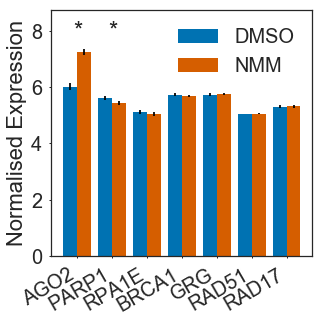

In [268]:
dna_damage_responsive = {
    'AT1G31280': 'AGO2',
    'AT4G21070': 'BRCA1',
    'AT4G22960': 'GRG',
    'AT2G31320': 'PARP1',
    'AT5G66130': 'RAD17',
    'AT5G20850': 'RAD51',
    'AT4G19130': 'RPA1E',
}

ax = barplot_gene_set(dna_damage_responsive)
ax.set_ylabel('Normalised Expression')
plt.tight_layout()
plt.savefig('nmm_dna_damage_response.svg')
plt.show()

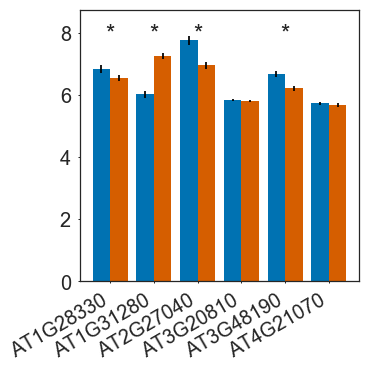

In [141]:
dna_damage_transposon = {
    'AT3G48190',
    'AT1G31280',
    'AT4G21070',
    'AT1G28330',
    'AT3G20810',
    'AT2G27040',
}
barplot_gene_set(dna_damage_transposon)
plt.show()

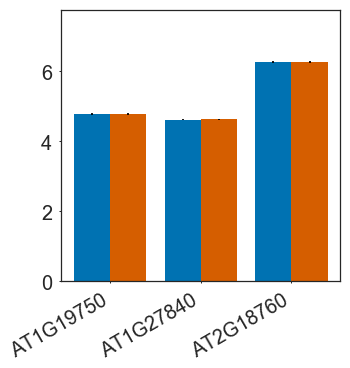

In [144]:
csa = {
    'AT1G27840',
    'AT1G19750',
    'AT2G18760',
}
barplot_gene_set(csa)
plt.show()

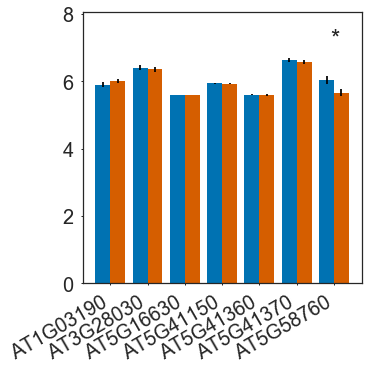

In [143]:
ner = {
    'AT5G41370',
    'AT5G41360',
    'AT5G16630',
    'AT1G03190',
    'AT5G58760',
    'AT5G41150',
    'AT3G28030'
}

barplot_gene_set(ner)
plt.show()

In [155]:
%%R
library(oligo)
library(affy)
indir <- '/home/matthew/Documents/analysis_notebooks/tair10_dna_damage/GSE23892_RAW'
cel <- paste(indir, list.celfiles(indir), sep='/')
cel <- read.affybatch(cel)
samples <- rep(c('wt', 'gamma'), each=3)
sampleNames(cel) <- paste(samples, rep(1:3, 2), sep='_')
sampleNames(cel)

[1] "wt_1"    "wt_2"    "wt_3"    "gamma_1" "gamma_2" "gamma_3"


In [157]:
%%R
rma_norm <- affy::rma(cel, target='core')

/home/matthew/anaconda3/envs/ml_python35/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: trying URL 'http://bioconductor.org/packages/3.6/data/annotation/src/contrib/ath1121501cdf_2.18.0.tar.gz'

  warnings.warn(x, RRuntimeWarning)
/home/matthew/anaconda3/envs/ml_python35/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning:  length 1733460 bytes (1.7 MB)

  warnings.warn(x, RRuntimeWarning)
/home/matthew/anaconda3/envs/ml_python35/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: downloaded 1.7 MB


  warnings.warn(x, RRuntimeWarning)


Background correcting
Normalizing
Calculating Expression


In [159]:
%%R
design <- model.matrix(~0 + samples)
rownames(design) <- sampleNames(rma_norm)
colnames(design) <- c('gamma', 'wt')
design

        gamma wt
wt_1        0  1
wt_2        0  1
wt_3        0  1
gamma_1     1  0
gamma_2     1  0
gamma_3     1  0
attr(,"assign")
[1] 1 1
attr(,"contrasts")
attr(,"contrasts")$samples
[1] "contr.treatment"



In [174]:
%%R -o gamma
library(ath1121501.db)
genes <- as.data.frame(ath1121501ACCNUM)
library(limma)
fit <- lmFit(rma_norm, design)
fit <- eBayes(fit)
cFit <- contrasts.fit(fit, contrast=makeContrasts(gamma - wt, levels=design))
cFit <- eBayes(cFit)
gamma <- merge(genes, topTable(cFit, n=Inf), by.x='probe_id', by.y=0)
head(gamma)

   probe_id   gene_id       logFC  AveExpr          t   P.Value adj.P.Val
1 244901_at ATMG00640 -0.01661110 3.635825 -0.1238167 0.9046649 0.9746555
2 244902_at ATMG00650 -0.06561472 3.679714 -0.6648389 0.5257645 0.8196680
3 244903_at ATMG00660  0.10988753 6.897283  0.1584594 0.8782147 0.9664150
4 244904_at ATMG00670 -0.10895220 5.424446 -0.5431584 0.6025467 0.8548914
5 244905_at ATMG00680 -0.15269326 3.722173 -1.2981424 0.2321604 0.6026252
6 244906_at ATMG00690 -0.24384158 5.507763 -1.4799612 0.1790111 0.5391133
          B
1 -7.165797
2 -6.932813
3 -7.160312
4 -7.011644
5 -6.318767
6 -6.092584


In [178]:
gamma.sort_values('logFC', ascending=False).head()

,probe_id,gene_id,logFC,AveExpr,t,P.Value,adj.P.Val,B
3425,248668_at,AT5G48720,6.193716,9.044168,44.214486,1.839221e-10,0.000003,12.839844
8755,254443_at,AT4G21070,5.932036,8.186774,33.567842,1.485152e-09,0.000005,11.732063
14620,261065_at,AT1G07500,5.793185,7.596315,36.482696,7.903608e-10,0.000005,12.100494
9580,255500_at,AT4G02390,5.529560,9.005923,30.500650,3.066652e-09,0.000007,11.272440
2427,247615_at,AT5G60250,5.505496,6.714147,40.818811,3.372832e-10,0.000003,12.551213


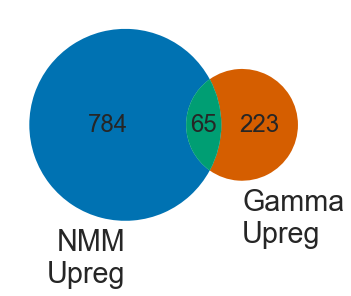

In [279]:
gamma_upreg = set(gamma[(gamma.logFC > 1) & (gamma['adj.P.Val'] < 0.05)].gene_id)
nmm_upreg = set(nmm_annot[(nmm_annot.logFC_NMM_6h_vs_DMSO_6h > 1) & (nmm_annot.PPLR_NMM_6h_vs_DMSO_6h > 0.95)].gene_id)

venn = vn.venn2([nmm_upreg, gamma_upreg], set_labels=['NMM\nUpreg', 'Gamma\nUpreg'], set_colors=pal[:2], alpha=1)
venn.get_patch_by_id('11').set_color(pal[2])
plt.tight_layout()
plt.savefig('./gamma_nmm_venn.svg')
plt.show()

In [271]:
print(stats.hypergeom.sf(
    len(gamma_upreg.intersection(nmm_upreg)) - 1,
    len(set(gamma.gene_id).intersection(set(nmm_annot.gene_id))),
    len(gamma_upreg),
    len(nmm_upreg),
))

2.88896037683e-29


In [281]:
print('\n'.join(gamma_upreg))

AT1G08930
AT5G51190
AT1G44830
AT5G20850
AT5G02220
AT1G27940
AT5G04720
AT1G78110
AT1G31280
AT3G11600
AT3G55005
AT1G72790
AT1G74440
AT1G23000
AT4G27280
AT5G15410
AT5G18470
AT4G22960
AT4G05370
AT3G60070
AT3G09020
AT2G47680
AT1G69840
AT1G76180
AT2G40140
AT2G20320
AT5G10380
AT4G34030
AT2G46400
AT5G43170
AT5G49990
AT1G20350
AT2G15490
AT2G46610
AT4G33160
AT5G11460
AT5G51180
AT3G56400
AT5G11850
AT1G17460
AT1G59660
AT4G01450
AT3G24890
AT3G50240
AT4G34320
AT5G20930
AT5G03670
AT4G22910
AT3G15180
AT3G07800
AT1G12480
AT1G30600
AT1G22890
AT3G27070
AT3G17690
AT2G30250
AT4G25330
AT2G26530
AT1G06070
AT2G31880
AT3G55980
AT5G25930
AT3G12510
AT1G80850
AT1G04650
AT5G61600
AT4G17490
AT5G60250
AT1G27730
AT4G28950
AT5G15380
AT1G12020
AT1G07520
AT1G05710
AT3G04060
AT1G64620
AT2G43480
AT5G51740
AT4G11740
AT3G63380
AT3G22930
AT4G02400
AT1G05490
AT5G01730
AT5G59420
AT3G25250
AT2G18190
AT4G02010
AT3G45730
AT5G07100
AT3G28210
AT1G03950
AT5G11410
AT5G23910
AT2G34670
AT3G61090
AT3G18250
AT2G41100
AT3G02400
AT2G34930
